In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [104]:
#Read the data
toyota = pd.read_csv("Toyoto_Corrola.csv")
toyota.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [105]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [106]:
# Drop 'Model' and 'Id' columns
toyota = toyota.drop(['Model', 'Id'], axis=1)


toyota.head()


,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170


In [107]:
#check for missing values
toyota.isna().sum()

Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

# Correlation Matrix

In [108]:
toyota.corr()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


# Scatterplot between variables along with histograms

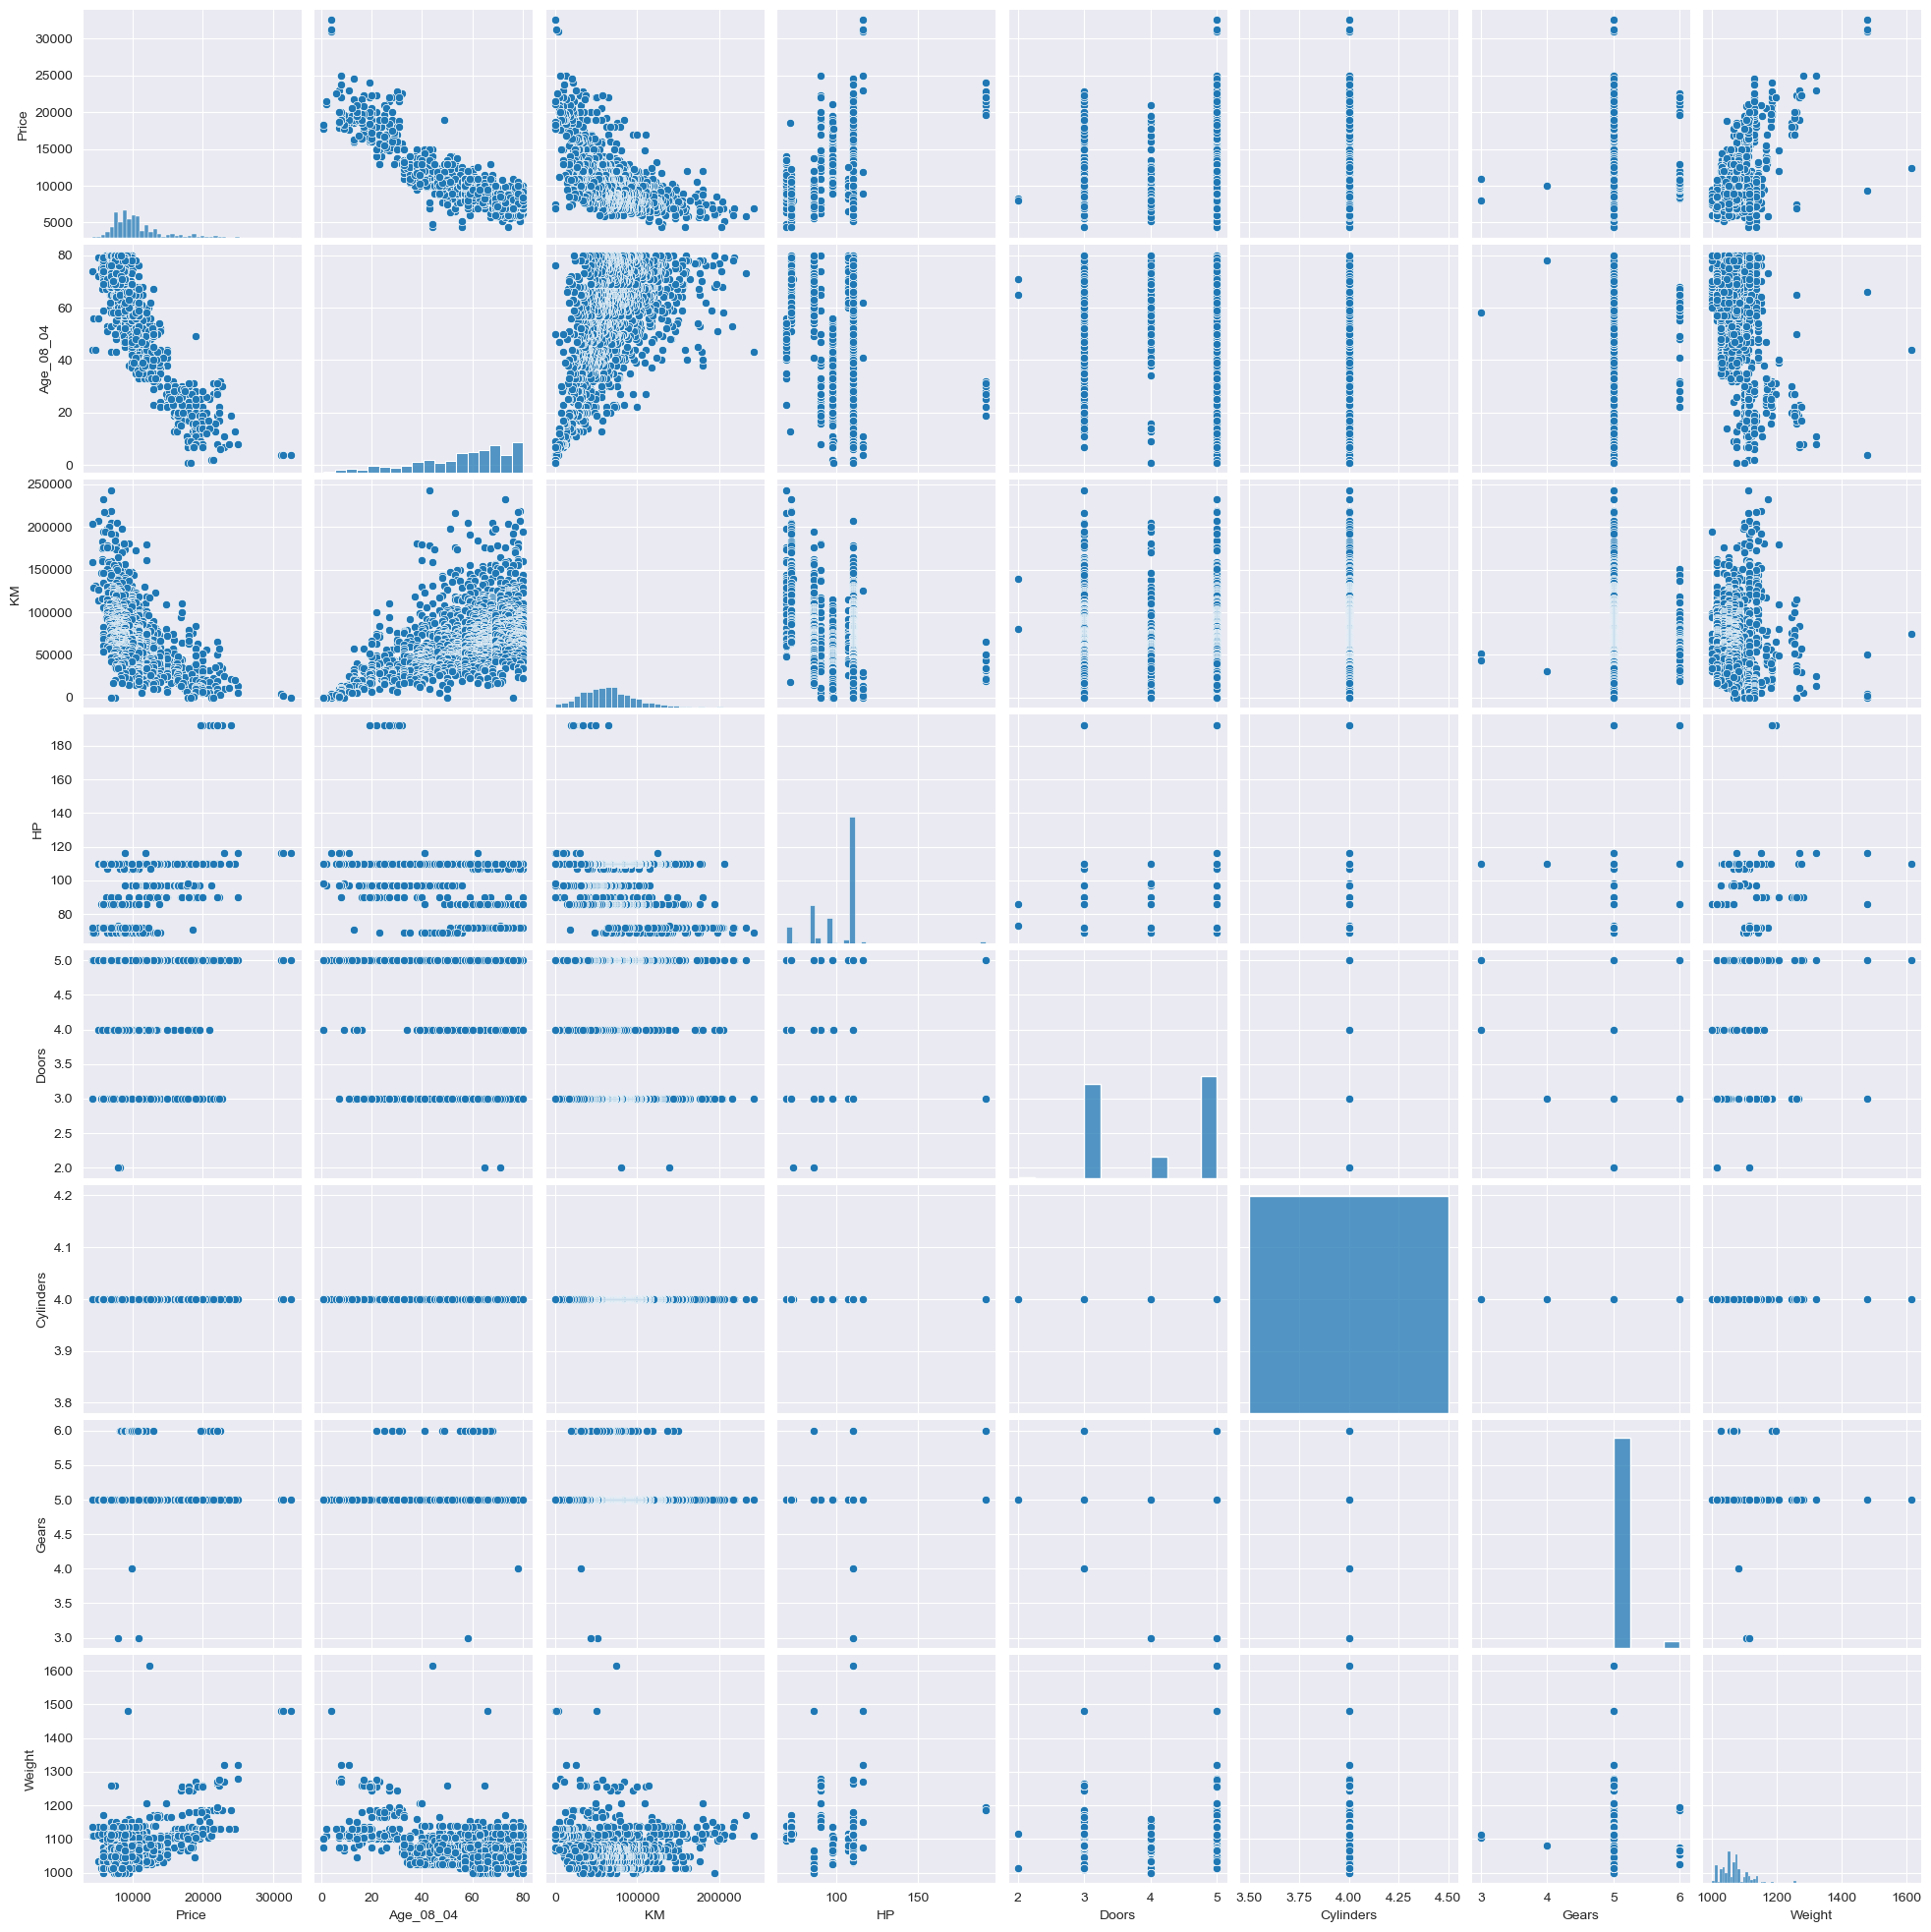

In [109]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(toyota)

# Preparing a model

In [110]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight',data=toyota).fit()

In [111]:
model.params

Intercept    -410.845504
Age_08_04    -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Cylinders   -1643.382016
Gears         622.282925
Weight         18.609651
dtype: float64

In [112]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -5.323309
Age_08_04   -46.728942
KM          -16.542560
HP           10.842418
Doors        -0.242055
Cylinders    -5.323309
Gears         3.152234
Weight       22.446903
dtype: float64 
 Intercept     1.181900e-07
Age_08_04    4.387432e-290
KM            2.238900e-56
HP            2.231791e-26
Doors         8.087723e-01
Cylinders     1.181900e-07
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64


In [113]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8628024511073656, 0.8622263942190831)

# Simple Linear Regression Models

In [114]:
ml_v=smf.ols('Price~Doors',data = toyota).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


# Calculating VIF

In [115]:
rsq_Age_08_04 = smf.ols('Age_08_04~KM+HP+Doors+Cylinders+Gears+Weight',data=toyota).fit().rsquared  
vif_Age_08_04 = 1/(1-rsq_Age_08_04) 

In [116]:
rsq_KM = smf.ols('KM~Age_08_04+HP+Doors+Cylinders+Gears+Weight',data=toyota).fit().rsquared  
vif_KM = 1/(1-rsq_KM)

In [117]:
rsq_HP = smf.ols('HP~Age_08_04+KM+Doors+Cylinders+Gears+Weight',data=toyota).fit().rsquared  
vif_HP = 1/(1-rsq_HP)

In [118]:
rsq_Doors = smf.ols('Doors~Age_08_04+KM+HP+Cylinders+Gears+Weight',data=toyota).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors)

In [119]:
rsq_Gears = smf.ols('Gears~Age_08_04+KM+HP+Doors+Cylinders+Weight',data=toyota).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears)

In [120]:
rsq_Weight = smf.ols('Weight~Age_08_04+KM+HP+Doors+Cylinders+Gears',data=toyota).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight)

In [121]:
# Storing vif values in a data frame
d1 = {'Variables':['Hp','KM','Age_08_04','Doors','Gears'],'VIF':[vif_HP,vif_KM,vif_Age_08_04 ,vif_Doors,vif_Gears]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Hp,1.214909
1,KM,1.627039
2,Age_08_04,1.874542
3,Doors,1.149301
4,Gears,1.096501


# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

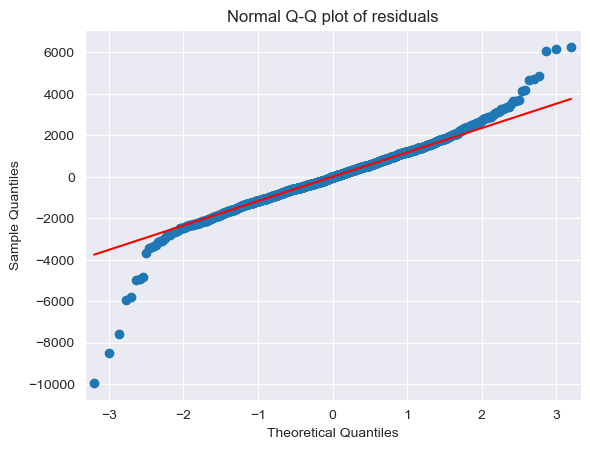

In [122]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [123]:
list(np.where(model.resid>4000))


[array([ 109,  110,  111,  125,  147,  171,  523, 1058], dtype=int64)]

# 

# Residual Plot for Homoscedasticity

In [124]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

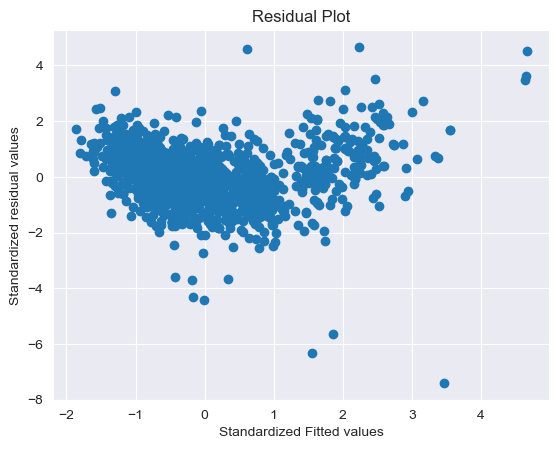

In [125]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

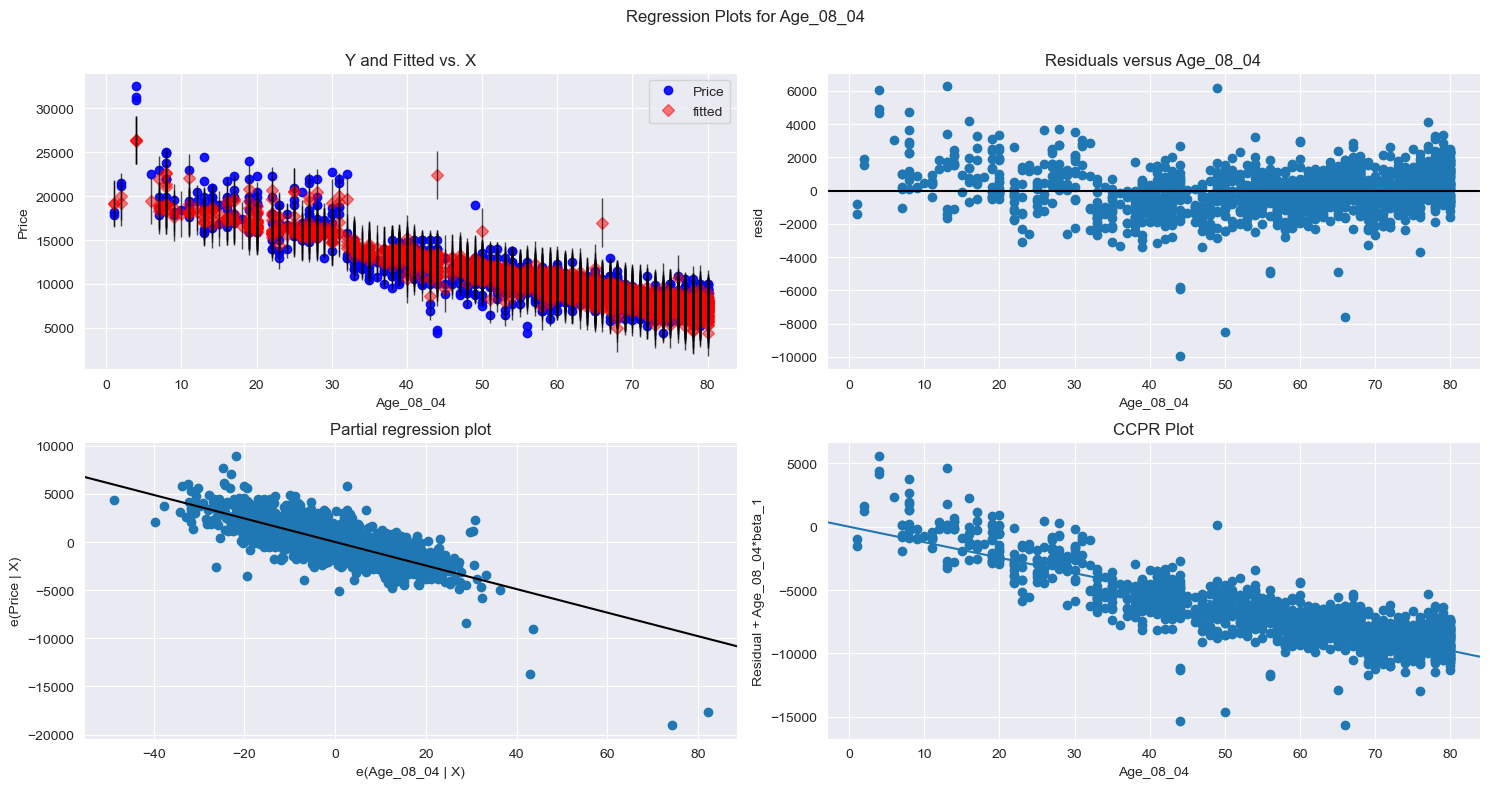

In [126]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()


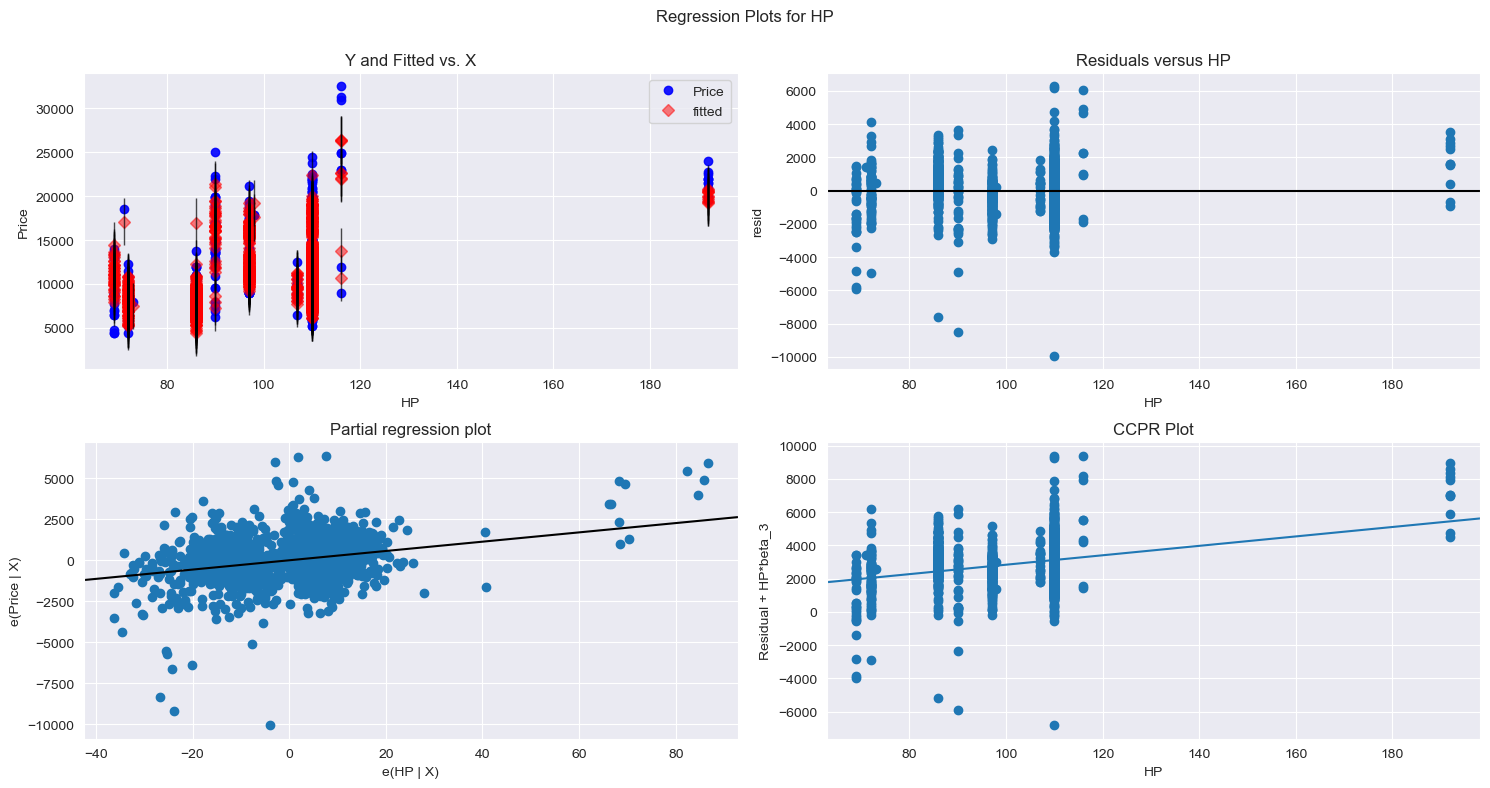

In [127]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()


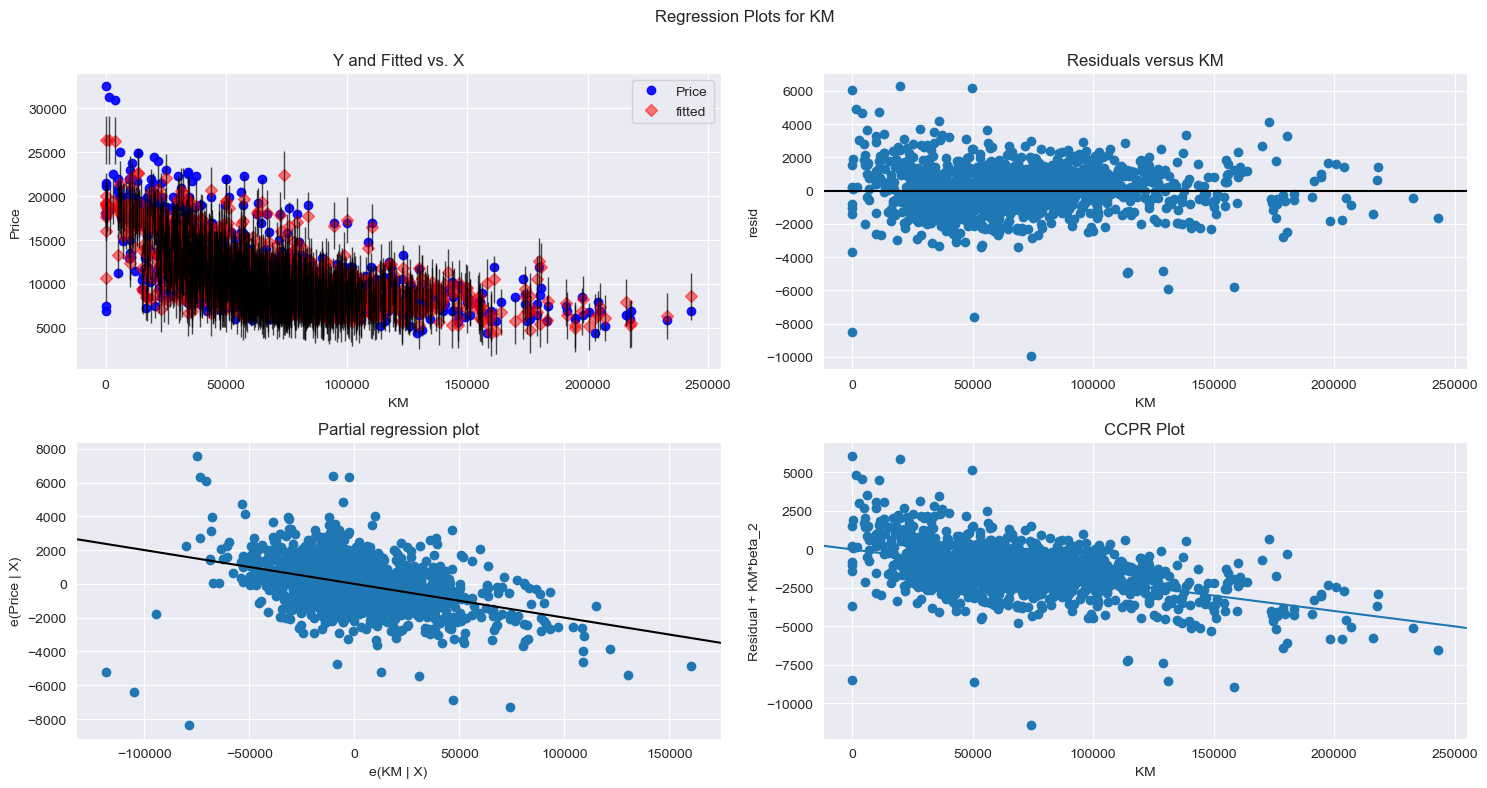

In [128]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()


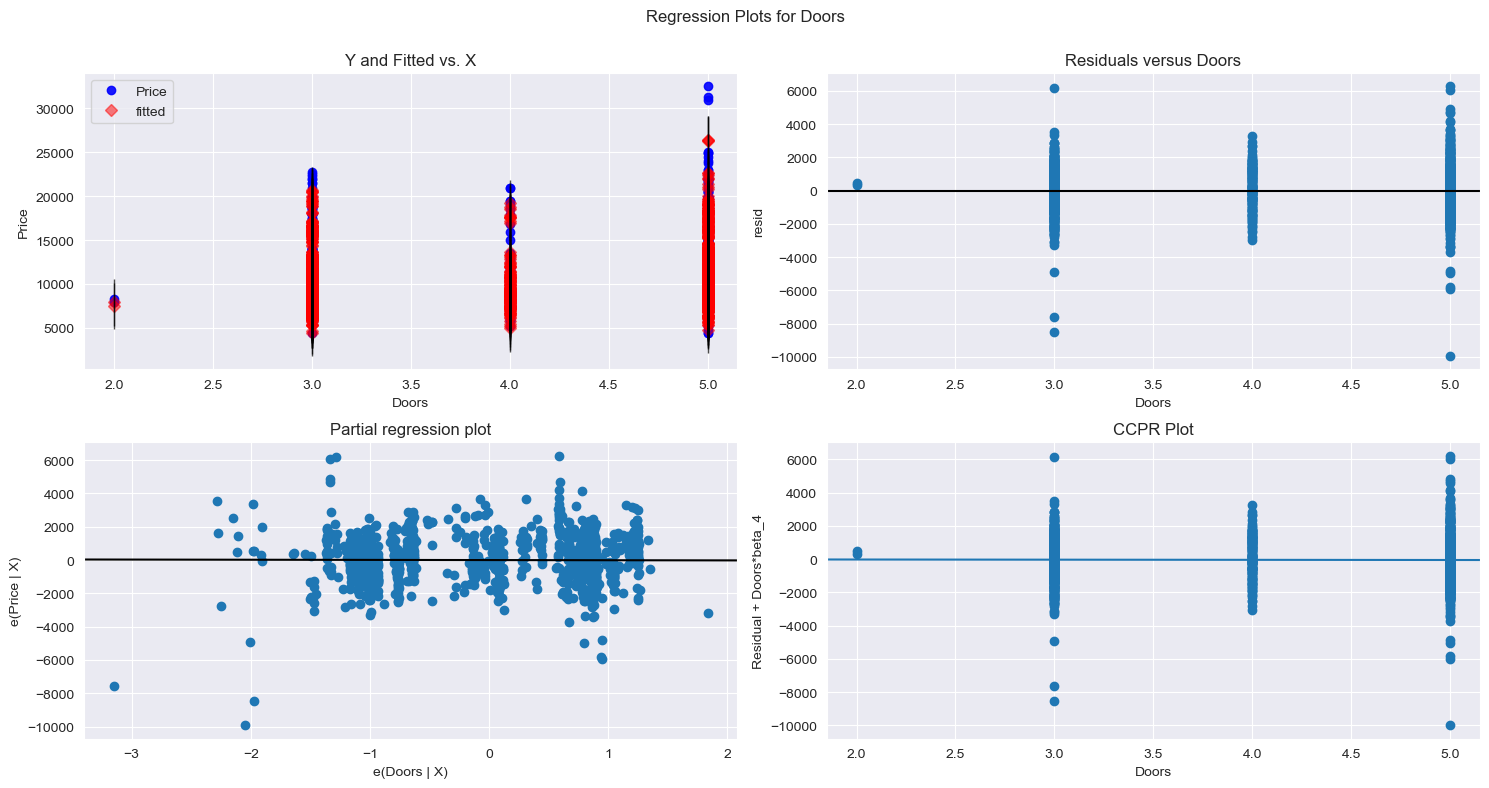

In [129]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()


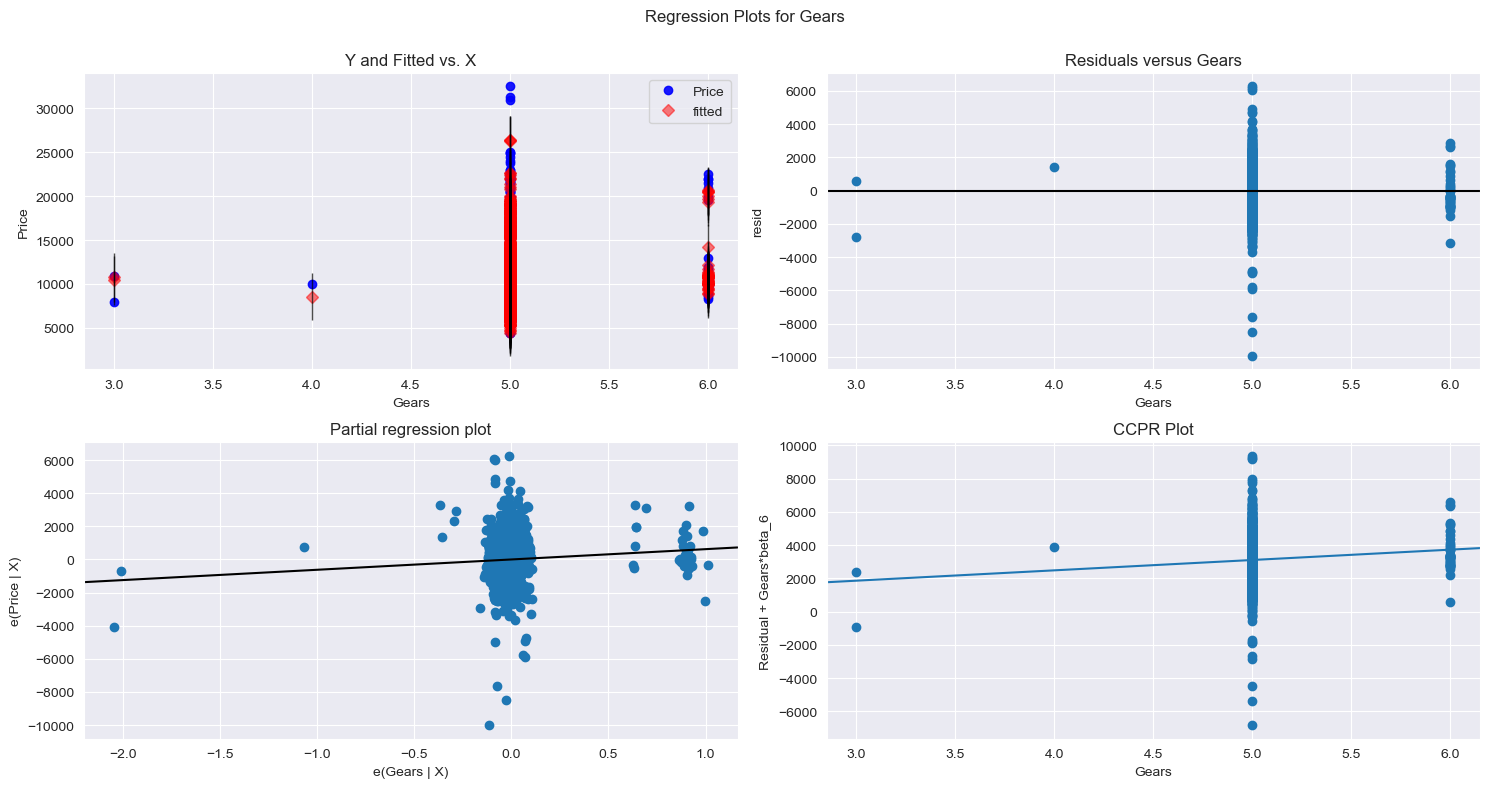

In [130]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()


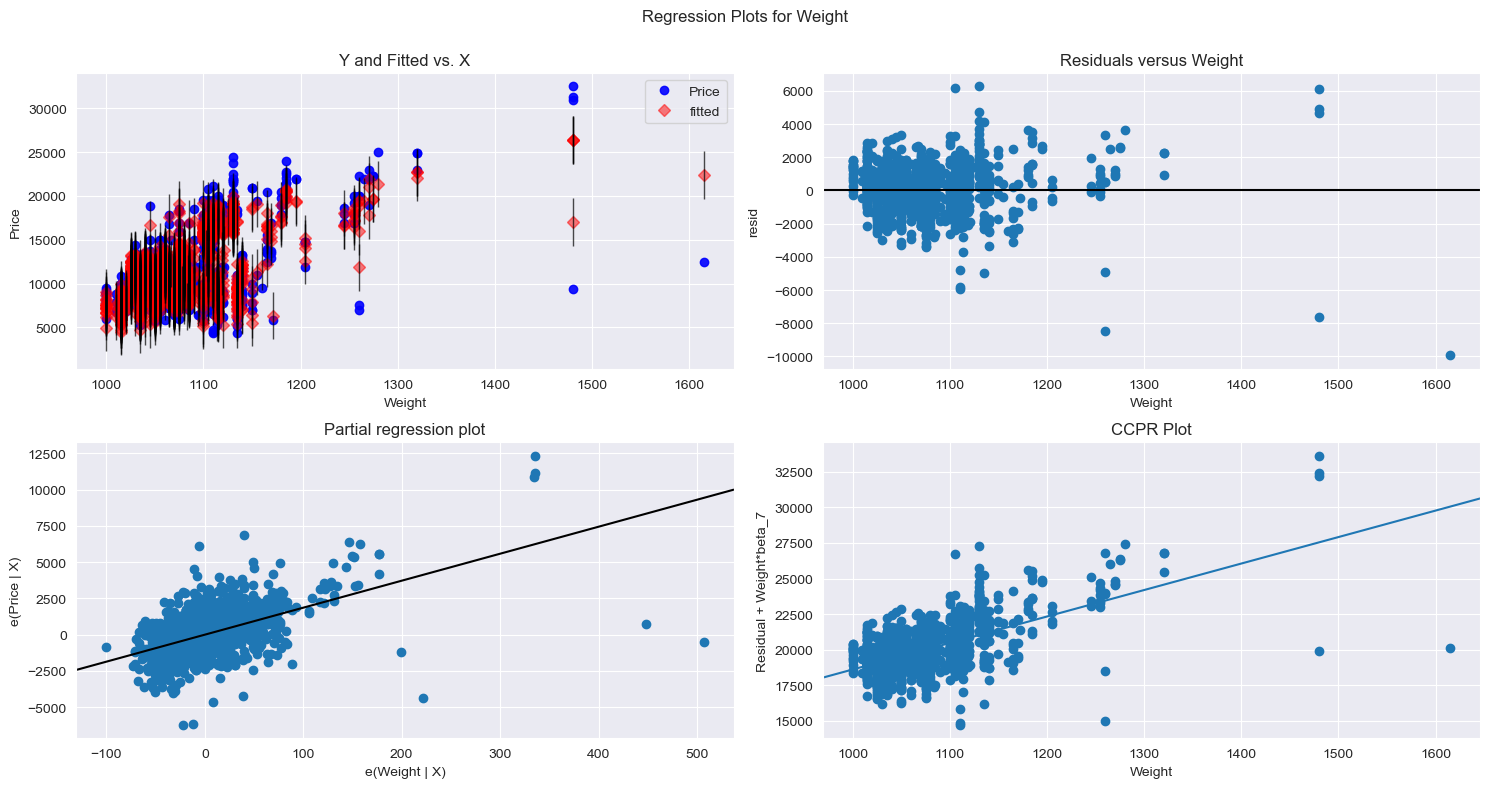

In [131]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()


# Model Deletion Diagnostics

# Detecting Influencers/Outliers

# Cook’s Distance

In [132]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
plt.show()

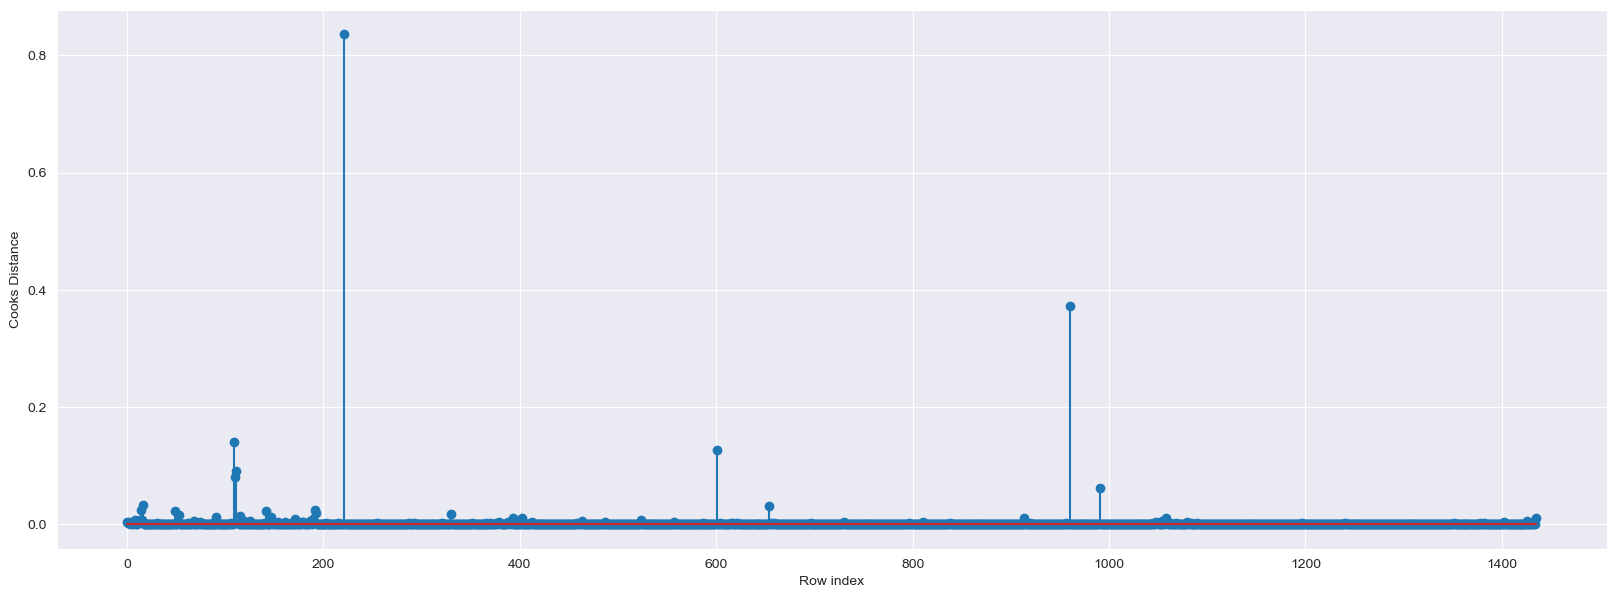

In [133]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [134]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(221, 0.8359007508851732)

# High Influence points

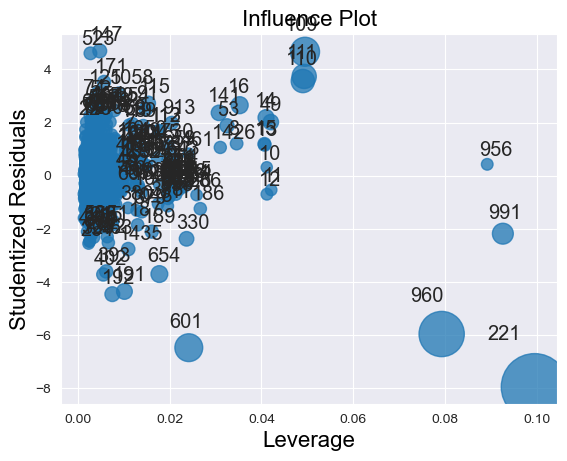

In [135]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [136]:
k = toyota.shape[1]
n = toyota.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [137]:
leverage_cutoff

0.018802228412256268

In [138]:
toyota.iloc[[960]]

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
960,9390,66,50806,86,3,4,5,1480


In [139]:
toyota[toyota.index.isin([960,221])]

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
221,12450,44,74172,110,5,4,5,1615
960,9390,66,50806,86,3,4,5,1480


In [140]:
toyota.head()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170


# Improving the model

In [141]:
#Load the data
toyota_new = pd.read_csv("Toyoto_Corrola.csv")

In [142]:
#Discard the data points which are influencers and reasign the row number (reset_index())
toyota1=toyota_new.drop(toyota_new.index[[221,960]],axis=0).reset_index()

In [143]:
#Drop the original index
toyota1=toyota1.drop(['index'],axis=1)

In [144]:
toyota1

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1430,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1431,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1432,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


# Build Model

In [148]:
#Exclude variable "Doors" and generate R-Squared and AIC values
final_ml_V= smf.ols('Price~Age_08_04+KM+HP+Cylinders+Gears+Weight',data = toyota1).fit()

In [149]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8726263626033617, 24633.77225172694)

# Cook’s Distance

In [150]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

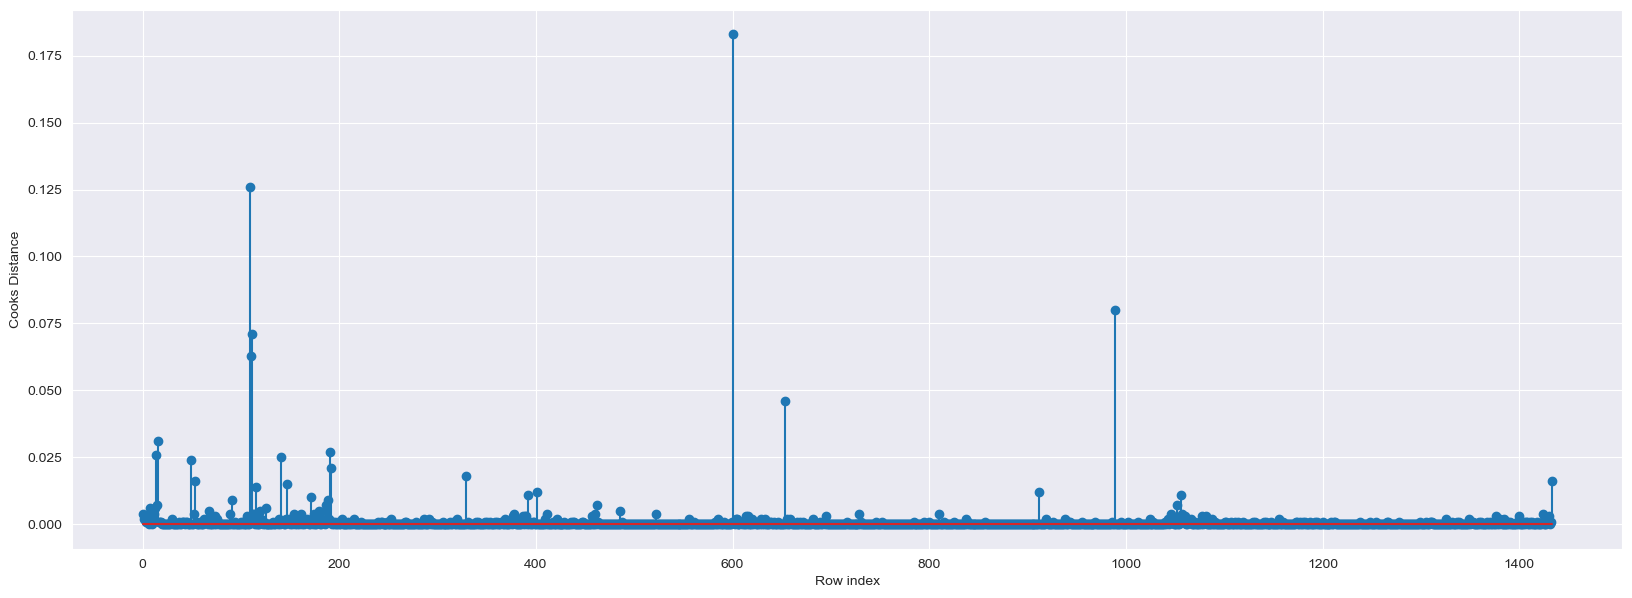

In [151]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [152]:
(np.argmax(c_V),np.max(c_V))

(600, 0.18257171982189987)

In [153]:
toyota2=toyota1.drop(toyota1.index[[600,]],axis=0)

In [154]:
toyota2


,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1430,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1431,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1432,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [155]:
#Reset the index and re arrange the row values
toyota3=toyota2.reset_index()

In [156]:
toyota4=toyota3.drop(['index'],axis=1)

In [157]:
toyota4

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1428,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1429,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1430,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1431,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [159]:
#Build the model on the new data
final_ml_V= smf.ols('Price~Age_08_04+KM+HP+Cylinders+Gears+Weight',data = toyota4).fit()

In [160]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

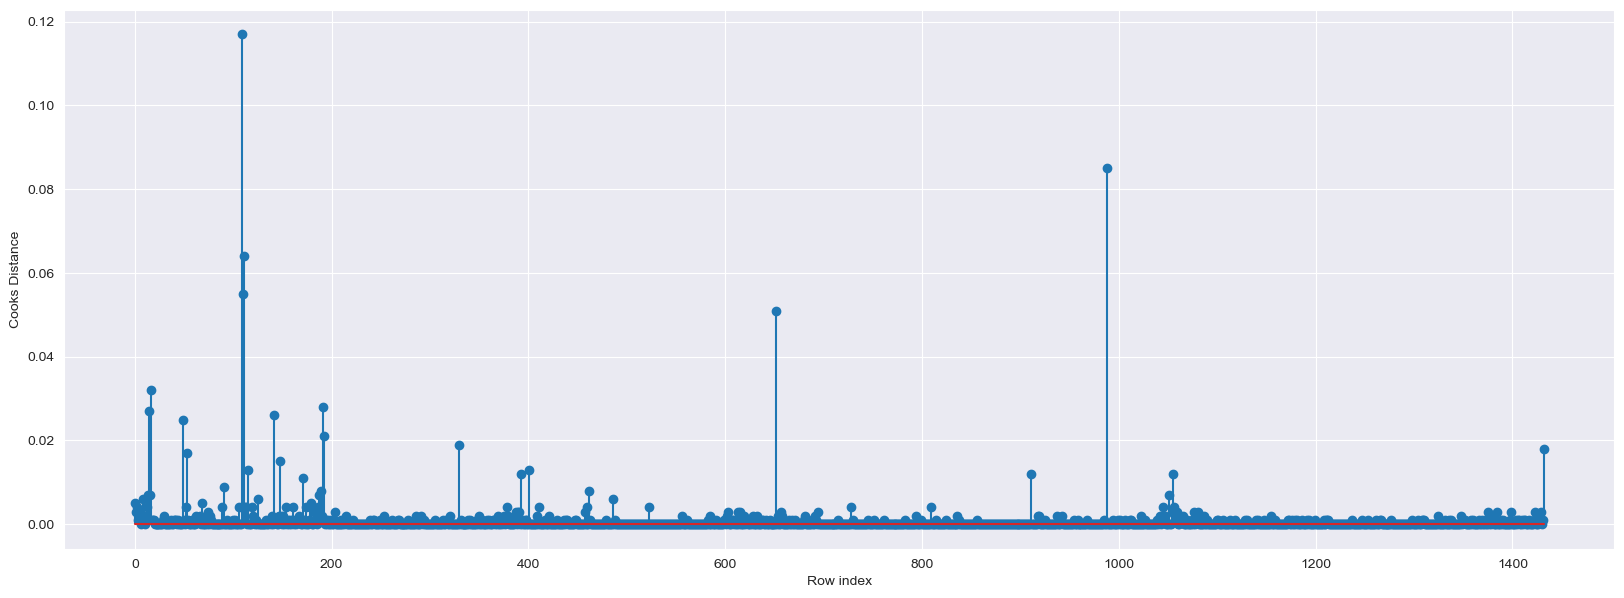

In [161]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [162]:

(np.argmax(c_V),np.max(c_V))

(109, 0.11713964528835454)

In [163]:
toyota5=toyota4.drop(toyota1.index[[109]],axis=0)

In [165]:
#Build the model on the new data
final_ml_V= smf.ols('Price~Age_08_04+KM+HP+Cylinders+Gears+Weight',data = toyota5).fit()

In [166]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

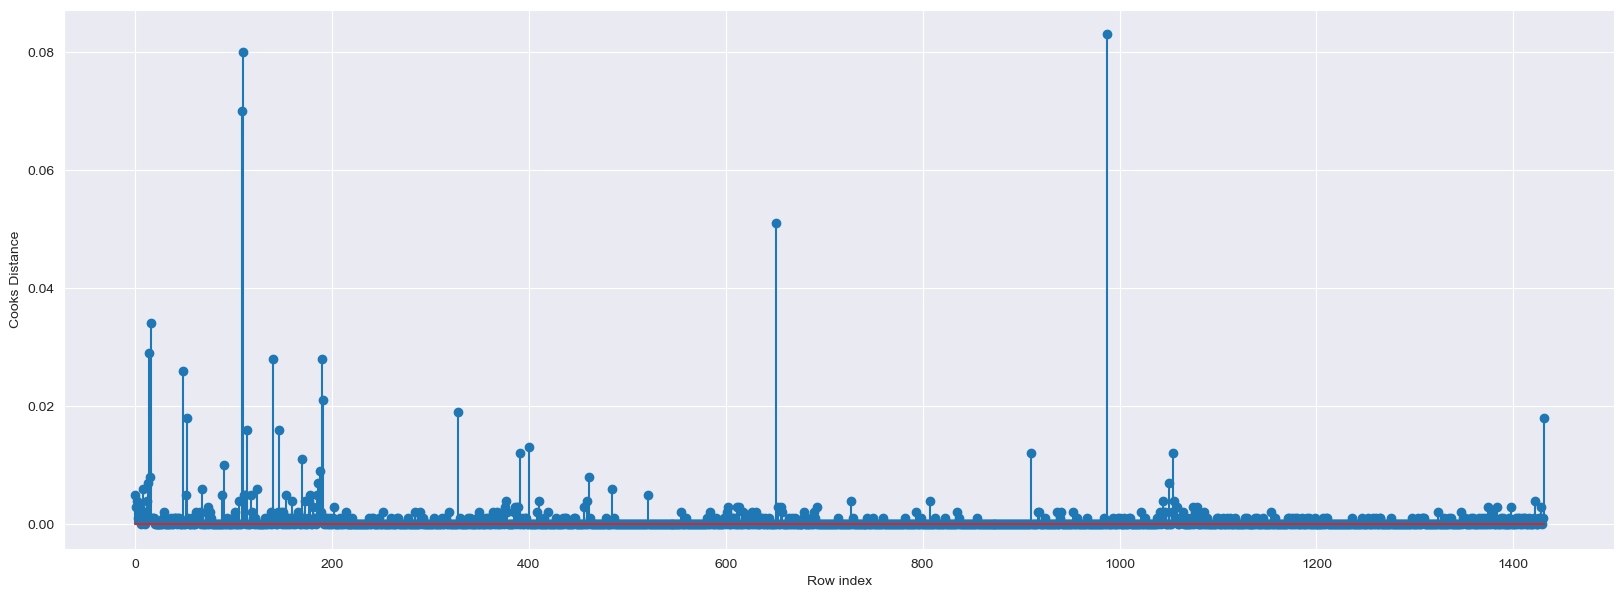

In [167]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota5)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [168]:
(np.argmax(c_V),np.max(c_V))

(987, 0.08312431630187947)

#Since the value is <1 , we can stop the diagnostic process and finalize the model

In [170]:
#Check the accuracy of the mode
final_ml_V= smf.ols('Price~Age_08_04+KM+HP+Cylinders+Gears+Weight',data = toyota5).fit()

In [189]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8752207370123123, 24534.712967356187)

# Predicting for new data


In [212]:
#New data for prediction
new_data=pd.DataFrame({"Age_08_04":23,"KM":46986,"HP":90,"Cylinders":4,"Gears":5,"Weight":1165},index=[1])


In [213]:
new_data

,Age_08_04,KM,HP,Cylinders,Gears,Weight
1,23,46986,90,4,5,1165


In [214]:
final_ml_V.predict(new_data)

1    16762.599064
dtype: float64

In [215]:
toyota5


,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1428,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1429,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1430,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1431,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015
